### Game of Pig

Rules:

1. Two players take turns rolling a single die as many times as they wish. Each roll adds a score equal to the number rolled to the player's total.
2. If a player rolls a 1, their score for that turn is zero, and their turn ends.
3. At any point during a player's turn, they can choose to stop rolling and keep their score. The first player to reach 100 wins.

That's it! Let's play.

There are two basic strategies for this game.  The first is known as roll-based strategy, where you roll a set number of times on each turn (unless you lose).  The second is known as score-based strategy, where you roll until you reach a certain score, and then stop.

Let's investigate the roll-based strategy.

In [4]:
# The usual libraries
import random
import matplotlib.pyplot as plt
import numpy as np


# A couple of debug flags to control print statements
debug1 = False
debug2 = False

# Number of games to simulate for each configuration
nsims = 1000

Now, let's look at the roll-based strategy.  In this strategy, we will roll a fixed number of times on each turn.  We will consider the same four end scores as above, and will consider the average roll per turn as a function of the number of rolls per turn.

In [5]:
# function to play an entire game of pig
# N_roll is the number of rolls per turn
# end_score is the score at which the game ends
# returns the average roll per turn

debug1 = False
debug2 = False

def game_play2(N_roll,end_score):

    # Initialize the score (for each of two players) and turn number within the game
    score = [0,0]
    turn = 0

    # Play the game - keep going until one player reaches the end score
    while score[0] < end_score and score[1] < end_score:

        # Initialize the score for this player during this turn and increment turn number
        turn_score = 0
        turn += 1

        if debug2:
            print("Turn", turn)
            for i in range(2):
                print("Player", i+1, "score:", score[i])
            print("Player", turn%2+1, "turn")

        roll = 0
        n_rolls = 0
        # Keep rolling until you roll a 1 or reach N_stop
        while roll != 1 and n_rolls < N_roll and score[turn%2] < end_score:

            roll = random.randint(1,6)
            n_rolls += 1

            if debug2:
                print("Roll:", roll)
                print("Number of rolls:", n_rolls)

            if roll == 1:
                if debug2:
                    print("Player", turn%2+1, "loses turn")
                # If you roll a 1, you lose all points for this turn and your turn is over
                score[turn%2] = score[turn%2] - turn_score
                break
            else:
                score[turn%2] += roll
                if debug2:
                    print("Player", turn%2+1, "score:", score[turn%2])
                #
                turn_score += roll

        if debug2:
            print("Player", turn%2+1, "turn over")
            print()

    if debug1:
        print(f"Final score: Player 1: {score[0]}, Player 2: {score[1]}")
        print(f"Player {np.argmax(score)+1} wins!")
        print(f"Game took {turn} turns")

    return 2.0*np.mean(score)/turn


In [6]:
# consider four different end scores .. 50, 100, 200, 500.  For each, plot the average roll vs. N_stop
end_score2 = [50, 100, 200, 500]

# initialize an array to hold the four different arrays of average roll vs. N_stop for the four different end scores.  Each array will have 49 elements, one for each N_stop from 1 to 49
avg_array_sum2 = []

for j in range(4):
    avg_array2 = []
    for nroll in range(1,20):
        sum_avg = 0
        for i in range(nsims):
            avg = game_play2(nroll,end_score2[j])
            sum_avg += avg
            #print(f"Average roll over all turns = {avg}")

        print(f"Average roll over all turns and sims for N_roll = {nroll} is {sum_avg/nsims}")
        avg_array2.append(sum_avg/nsims)

    avg_array_sum2.append(avg_array2)

Average roll over all turns and sims for N_roll = 1 is 3.391739316095003
Average roll over all turns and sims for N_roll = 2 is 5.620932195875343
Average roll over all turns and sims for N_roll = 3 is 7.2251467297425345
Average roll over all turns and sims for N_roll = 4 is 8.225063811688038
Average roll over all turns and sims for N_roll = 5 is 8.779584039081843
Average roll over all turns and sims for N_roll = 6 is 9.47184734601106
Average roll over all turns and sims for N_roll = 7 is 9.953669569639391
Average roll over all turns and sims for N_roll = 8 is 9.882986385682235
Average roll over all turns and sims for N_roll = 9 is 9.383400513138117
Average roll over all turns and sims for N_roll = 10 is 8.479450338842545
Average roll over all turns and sims for N_roll = 11 is 9.223643645097166
Average roll over all turns and sims for N_roll = 12 is 10.653646216281182
Average roll over all turns and sims for N_roll = 13 is 12.265170644287945
Average roll over all turns and sims for N_ro

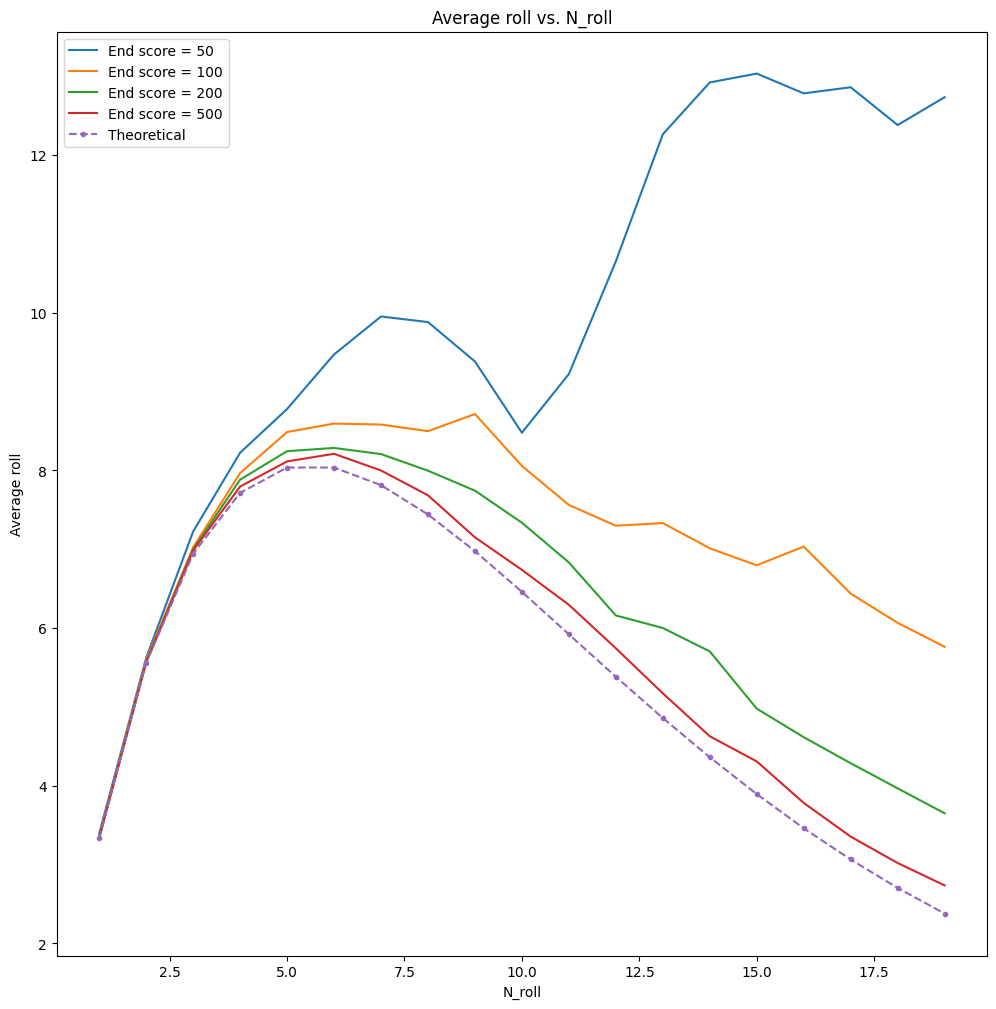

In [7]:
# plot the average roll vs. N_stop for each of the four end scores
fig, ax = plt.subplots(1,1, figsize=(12,12))
for j in range(4):
    ax.plot(range(1,20), avg_array_sum2[j], label=f"End score = {end_score2[j]}")
    ax.set_xlabel("N_roll")
    ax.set_ylabel("Average roll")
    ax.set_title("Average roll vs. N_roll")

# calculate the theoretical average roll per turn for each N_roll and add to the plot
nroll = np.arange(1, 20)
prob = (5/6)**nroll * 4 * nroll

ax.plot(nroll, prob, '.--', label='Theoretical')
ax.legend()



In [5]:
# Testing the game_play2 function
debug1 = True
debug2 = True
avg = game_play2(3,100)
print(avg)

Turn 1
Player 1 score: 0
Player 2 score: 0
Player 2 turn
Roll: 6
Number of rolls: 1
Player 2 score: 6
Roll: 6
Number of rolls: 2
Player 2 score: 12
Roll: 4
Number of rolls: 3
Player 2 score: 16
Player 2 turn over

Turn 2
Player 1 score: 0
Player 2 score: 16
Player 1 turn
Roll: 3
Number of rolls: 1
Player 1 score: 3
Roll: 3
Number of rolls: 2
Player 1 score: 6
Roll: 5
Number of rolls: 3
Player 1 score: 11
Player 1 turn over

Turn 3
Player 1 score: 11
Player 2 score: 16
Player 2 turn
Roll: 1
Number of rolls: 1
Player 2 loses turn
Player 2 turn over

Turn 4
Player 1 score: 11
Player 2 score: 16
Player 1 turn
Roll: 4
Number of rolls: 1
Player 1 score: 15
Roll: 3
Number of rolls: 2
Player 1 score: 18
Roll: 1
Number of rolls: 3
Player 1 loses turn
Player 1 turn over

Turn 5
Player 1 score: 11
Player 2 score: 16
Player 2 turn
Roll: 3
Number of rolls: 1
Player 2 score: 19
Roll: 6
Number of rolls: 2
Player 2 score: 25
Roll: 1
Number of rolls: 3
Player 2 loses turn
Player 2 turn over

Turn 6
Pla